In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d vishalmane109/indian-currency-note-images-dataset-2020

100% 2.31G/2.31G [02:04<00:00, 22.6MB/s]
100% 2.31G/2.31G [02:04<00:00, 19.9MB/s]


In [3]:
from zipfile import ZipFile
dataset = '/content/indian-currency-note-images-dataset-2020.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

In [5]:
train_folder=os.listdir('/content/Indian currency dataset v1/training')
print(train_folder)
print(len(train_folder))

['2000', '10', '20', '500', '100', 'Background', '50', '200']
8


In [6]:
data=[]

In [9]:
for i in range(8):
  folder_path='/content/Indian currency dataset v1/training/'+train_folder[i]
  img_folder=os.listdir(folder_path)
  l=len(img_folder)
  for j in range(l):
    img_path=folder_path+'/'+img_folder[j]
    img_pillow=Image.open(img_path)
    img_color=img_pillow.convert('RGB')
    img_resize=img_color.resize((64,64))
    img_arr=np.array(img_resize)
    data.append([img_arr,i])

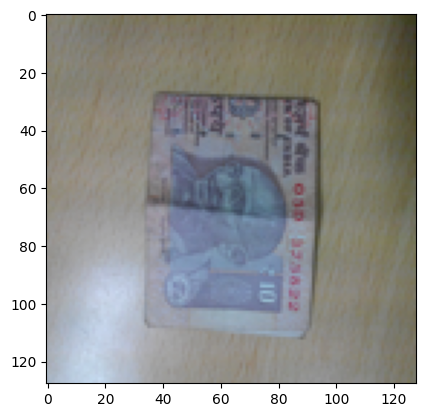

In [16]:
img_path='/content/Indian currency dataset v1/training/10/10__121.jpg'
img_pillow=Image.open(img_path)
img_color=img_pillow.convert('RGB')
img_resize=img_color.resize((128,128))
img_arr=np.array(img_resize)
plt.imshow(img_arr)

In [17]:
x=[]
y=[]
for img,label in data:
  x.append(img)
  y.append(label)

In [19]:
x=np.array(x)
y=np.array(y)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [22]:
x_train_scaled=x_train/255

In [25]:
import tensorflow as tf
from tensorflow import keras

In [26]:
num_of_classes=8
model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(64,64,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='softmax'))

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.1)

Epoch 1/100
91/91 [==============================] - 1s 8ms/step - loss: 0.8357 - accuracy: 0.6994 - val_loss: 0.9341 - val_accuracy: 0.6480
Epoch 2/100
91/91 [==============================] - 1s 7ms/step - loss: 0.7631 - accuracy: 0.7233 - val_loss: 0.9763 - val_accuracy: 0.6760
Epoch 3/100
91/91 [==============================] - 1s 7ms/step - loss: 0.7274 - accuracy: 0.7417 - val_loss: 0.9186 - val_accuracy: 0.6916
Epoch 4/100
91/91 [==============================] - 1s 7ms/step - loss: 0.6560 - accuracy: 0.7739 - val_loss: 0.9959 - val_accuracy: 0.6885
Epoch 5/100
91/91 [==============================] - 1s 6ms/step - loss: 0.5680 - accuracy: 0.7999 - val_loss: 0.9258 - val_accuracy: 0.7165
Epoch 6/100
91/91 [==============================] - 1s 7ms/step - loss: 0.5150 - accuracy: 0.8220 - val_loss: 0.9550 - val_accuracy: 0.6916
Epoch 7/100
91/91 [==============================] - 1s 7ms/step - loss: 0.5257 - accuracy: 0.8168 - val_loss: 0.9684 - val_accuracy: 0.7103
Epoch 8/100
9

In [34]:
input_img_path='/content/Indian currency dataset v1/training/50/50__1.jpg'
img_pillow=Image.open(input_img_path)
img_color=img_pillow.convert('RGB')
img_resize=img_color.resize((64,64))
img_arr=np.array(img_resize)
img_scaled=img_arr/255
img_reshape=np.reshape(img_scaled,[1,64,64,3])
prediction=model.predict(img_reshape)
output=np.argmax(prediction)
if(output==0):
  print('The note is Two Thousand Rupees Note(2000)')
elif(output==1):
  print('The note is Ten Rupees Note(10)')
elif(output==2):
  print('The note is Twenty Rupees Note(20)')
elif(output==3):
  print('The note is Five Hundered Rupees Note(500)')
elif(output==4):
  print('The note is Hundered Rupees Note(100)')
elif(output==5):
  print('The Image is Background Image')
elif(output==6):
  print('The note is Fifty Rupees Note(50)')
elif(output==7):
  print('The note is Two Hundered Rupees Note(200)')

1/1 [==============================] - 0s 19ms/step
The note is Fifty Rupees Note(50)
